# Pré-processamento de dados

Contempla:

- Balanceamento de dados
- Dados incompletos
- Limpeza de potenciais ruídos
- Transformações de dados
- Redução dimensional

In [4]:
from sklearn.datasets import load_iris
from imblearn.datasets import make_imbalance
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import LeaveOneOut
from imblearn.pipeline import Pipeline
import matplotlib.pyplot as plt
import seaborn as sns
from imblearn.over_sampling import SMOTE
from imblearn.under_sampling import RandomUnderSampler
import numpy as np
import pandas as pd
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2
from sklearn.feature_selection import RFE
from sklearn.preprocessing import OneHotEncoder

Matplotlib is building the font cache; this may take a moment.


## Desbalanceamento

O que será feito:
- Gerado um conjunto reduzido do iris, com 2 atributos (pétalas) e 2 classes (versicolor e virginica), feito o plot dele para visualização e uso dele para treinar e testar um algoritmo k-vizinhos mais próximos, verificando a acurácia geral e por classe. Esse conjunto é balanceado (cada classes tem metade das observações)

- Gerado um conjunto desbalanceado a partir do anterior (uma classe terá 1/5 do tamanho da outra), feito o plot dele para visualização e uso dele para treinar e testar um algoritmo k-vizinhos mais próximos, verificando a acurácia geral e por classe

- Realização de balanceamento do conjunto desbalanceado anterior por SMOTE, feito o plot dele para visualização e uso dele para treinar e testar um algoritmo k-vizinhos mais próximos, verificando a acurácia geral e por classe

- Realização de balanceamento do conjunto desbalanceado anterior por undersampling, feito o plot dele para visualização e uso dele para treinar e testar um algoritmo k-vizinhos mais próximos, verificando a acurácia geral e por classe

Carregando o dataset iris

In [ ]:
iris = load_iris()
X = iris.data
y = iris.target

Gerando uma versão reduzida do iris contendo somente os atributos de pétala e as classes virginica e versicolor

In [ ]:
# Selecionar apenas os atributos de pétala
X_petal = X[:, 2:]

# Selecionar apenas as amostras das classes versicolor e virginica
mask = (y == 1) | (y == 2)
X_petal_filtered = X_petal[mask]
y_petal_filtered = y[mask]

# Imprimir o número de amostras de cada classe
print("Número de amostras de cada classe no conjunto filtrado:")
print(f"Classe 1: {y_petal_filtered[y_petal_filtered == 1].shape[0]}")
print(f"Classe 2: {y_petal_filtered[y_petal_filtered == 2].shape[0]}")


Número de amostras de cada classe no conjunto filtrado:
Classe 1: 50
Classe 2: 50


Plotando o conjunto de dados

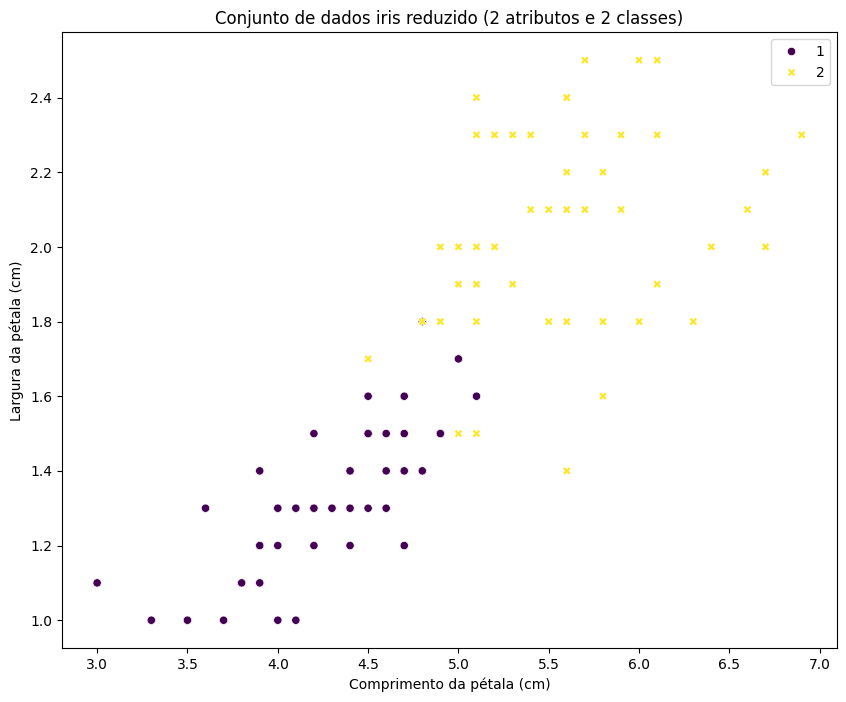

In [ ]:
plt.figure(figsize=(10, 8))
sns.scatterplot(x=X_petal_filtered[:, 0], y=X_petal_filtered[:, 1], hue=y_petal_filtered, style=y_petal_filtered,palette="viridis")
plt.title("Conjunto de dados iris reduzido (2 atributos e 2 classes)")
plt.xlabel("Comprimento da pétala (cm)")
plt.ylabel("Largura da pétala (cm)")
plt.show()

Executando o algoritmo kNN no conjunto iris reduzido e calculando acurácias geral e por classe

In [ ]:
# Executando kNN no conjunto iris com duas classes e dois atributos
knn = KNeighborsClassifier(n_neighbors=3)
scores = cross_val_score(knn, X_petal_filtered, y_petal_filtered, cv=LeaveOneOut())

# Imprimir os resultados
print("Acurácia média e std do knn no conjunto iris reduzido usando LOO:", scores.mean(),"e","{:.2f}".format(scores.std()))
print("Acurácia média e std do knn na classe 1 do conjunto iris com dois atributos:", scores[y_petal_filtered==1].mean(),"e","{:.2f}".format(scores[y_petal_filtered==1].std()))
print("Acurácia média e std do knn na classe 2 do conjunto iris com dois atributos:", scores[y_petal_filtered==2].mean(),"e","{:.2f}".format(scores[y_petal_filtered==2].std()))


Acurácia média e std do knn no conjunto iris reduzido usando LOO: 0.94 e 0.24
Acurácia média e std do knn na classe 1 do conjunto iris com dois atributos: 0.94 e 0.24
Acurácia média e std do knn na classe 2 do conjunto iris com dois atributos: 0.94 e 0.24


Gerando uma versão desbalanceada do conjunto iris reduzido, em que a classe 1 será minoritária

In [ ]:
# Gerar uma versão desbalanceada do conjunto de dados
X_imb, y_imb = make_imbalance(
    X_petal_filtered, y_petal_filtered,
    sampling_strategy={1: 10, 2: 50},
    random_state=0
)

# Imprimir o número de amostras de cada classe
print("Número de amostras de cada classe no primeiro conjunto:")
print(f"Classe 1: {y_imb[y_imb == 1].shape[0]}")
print(f"Classe 2: {y_imb[y_imb == 2].shape[0]}")

Número de amostras de cada classe no primeiro conjunto:
Classe 1: 10
Classe 2: 50


Plotando o conjunto de dados desbalanceado

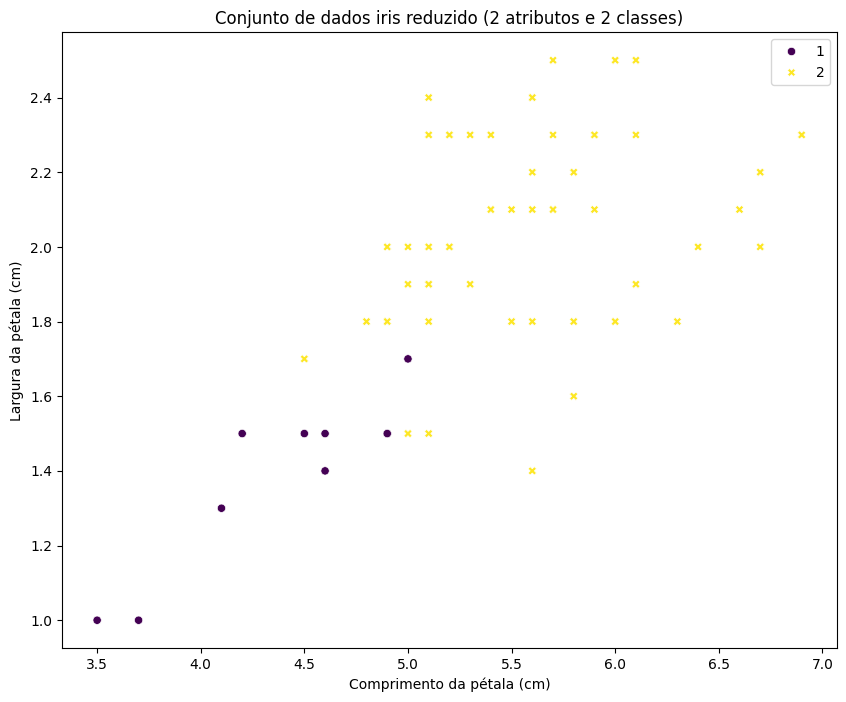

In [ ]:
plt.figure(figsize=(10, 8))
sns.scatterplot(x=X_imb[:, 0], y=X_imb[:, 1], hue=y_imb, style=y_imb,palette="viridis")
plt.title("Conjunto de dados iris reduzido (2 atributos e 2 classes)")
plt.xlabel("Comprimento da pétala (cm)")
plt.ylabel("Largura da pétala (cm)")
plt.show()

Executando kNN nesse conjunto reduzido e verificando a acurácia geral e por classe

In [ ]:

# Executar knn em X_imb, y_imb usando LOO
knn = KNeighborsClassifier(n_neighbors=3)
scores = cross_val_score(knn, X_imb, y_imb, cv=LeaveOneOut())

# Imprimir os resultados
print("Acurácia média e std do knn no conjunto desbalanceado usando LOO:", scores.mean(),"e","{:.2f}".format(scores.std()))
print("Acurácia média e std do knn na classe minoritária (1) do conjunto desbalanceado:", scores[y_imb==1].mean(),"e","{:.2f}".format(scores[y_imb==1].std()))
print("Acurácia média e std do knn na classe majoritária (2) do conjunto desbalanceado:", scores[y_imb==2].mean(),"e","{:.2f}".format(scores[y_imb==2].std()))


Acurácia média e std do knn no conjunto desbalanceado usando LOO: 0.9 e 0.30
Acurácia média e std do knn na classe minoritária (1) do conjunto desbalanceado: 0.7 e 0.46
Acurácia média e std do knn na classe majoritária (2) do conjunto desbalanceado: 0.94 e 0.24


Gerando um conjunto balanceado com SMOTE (oversampling)

In [ ]:

# Gerar um conjunto balanceado a partir de X_imb e y_imb usando SMOTE
sm = SMOTE(random_state=42)
X_bal, y_bal = sm.fit_resample(X_imb, y_imb)

# Imprimir o número de amostras de cada classe no conjunto balanceado
print("Número de amostras de cada classe no conjunto balanceado:")
print(f"Classe 1: {y_bal[y_bal == 1].shape[0]}")
print(f"Classe 2: {y_bal[y_bal == 2].shape[0]}")


Número de amostras de cada classe no conjunto balanceado:
Classe 1: 50
Classe 2: 50


Plotando o conjunto de dados balanceado com SMOTE

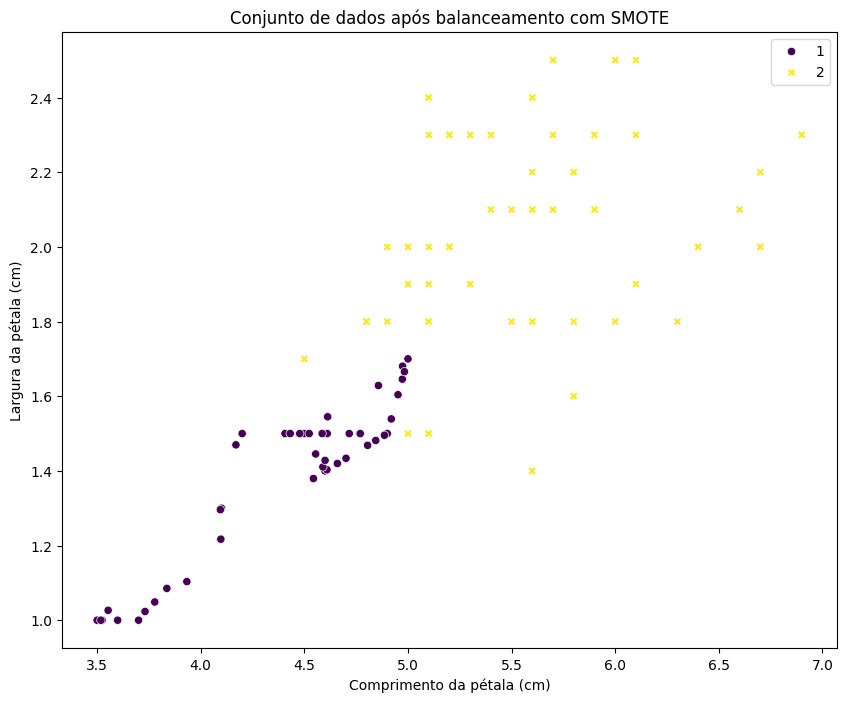

In [ ]:

plt.figure(figsize=(10, 8))
sns.scatterplot(x=X_bal[:, 0], y=X_bal[:, 1], hue=y_bal, style=y_bal,palette="viridis")
plt.title("Conjunto de dados após balanceamento com SMOTE")
plt.xlabel("Comprimento da pétala (cm)")
plt.ylabel("Largura da pétala (cm)")
plt.show()

Balanceando os conjuntos de treinamento com SMOTE (oversampling) e vendo efeito no kNN

In [ ]:
# Criar um pipeline com SMOTE e KNN
pipeline = Pipeline([
    ('smote', SMOTE(random_state=42)),
    ('knn', KNeighborsClassifier(n_neighbors=3))
])

# Executar o pipeline em X_imb e y_imb usando LOO
scores = cross_val_score(pipeline, X_imb, y_imb, cv=LeaveOneOut())

# Imprimir os resultados
print("Acurácia média e std do pipeline no conjunto balanceado por SMOTE usando LOO:", scores.mean(),"e","{:.2f}".format(scores.std()))
print("Acurácia média e std do pipeline na classe minoritária (1) do conjunto balanceado por SMOTE:", scores[y_imb==1].mean(),"e","{:.2f}".format(scores[y_imb==1].std()))
print("Acurácia média e std do pipeline na classe majoritária (2) do conjunto balanceado por SMOTE:", scores[y_imb==2].mean(),"e","{:.2f}".format(scores[y_imb==2].std()))


Acurácia média e std do pipeline no conjunto balanceado por SMOTE usando LOO: 0.9333333333333333 e 0.25
Acurácia média e std do pipeline na classe minoritária (1) do conjunto balanceado por SMOTE: 0.9 e 0.30
Acurácia média e std do pipeline na classe majoritária (2) do conjunto balanceado por SMOTE: 0.94 e 0.24


Balanceando agora com random undersampling

In [ ]:

# Gerar um conjunto balanceado a partir de X_imb e y_imb usando undersampling
rus = RandomUnderSampler(random_state=42)
X_bal, y_bal = rus.fit_resample(X_imb, y_imb)

# Imprimir o número de amostras de cada classe no conjunto balanceado
print("Número de amostras de cada classe no conjunto balanceado com undersampling:")
print(f"Classe 1: {y_bal[y_bal == 1].shape[0]}")
print(f"Classe 2: {y_bal[y_bal == 2].shape[0]}")




Número de amostras de cada classe no conjunto balanceado com undersampling:
Classe 1: 10
Classe 2: 10


Plotando o conjunto de dados balanceado por undersampling

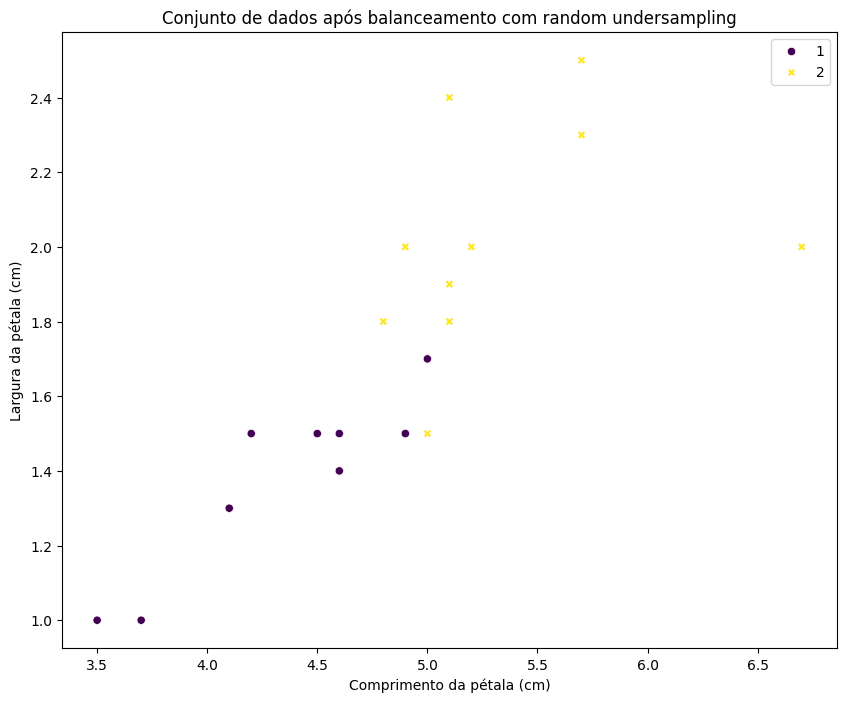

In [ ]:
plt.figure(figsize=(10, 8))
sns.scatterplot(x=X_bal[:, 0], y=X_bal[:, 1], hue=y_bal, style=y_bal,palette="viridis")
plt.title("Conjunto de dados após balanceamento com random undersampling")
plt.xlabel("Comprimento da pétala (cm)")
plt.ylabel("Largura da pétala (cm)")
plt.show()

Balanceando os conjuntos de treinamento com undersampling (RandomUnderSampler) e vendo efeito no kNN

In [ ]:

# Criar um pipeline com undersampling e KNN
pipeline = Pipeline([
    ('undersampling', RandomUnderSampler(random_state=42)),
    ('knn', KNeighborsClassifier(n_neighbors=3))
])

# Executar o pipeline em X_imb e y_imb usando LOO
scores = cross_val_score(pipeline, X_imb, y_imb, cv=LeaveOneOut())

# Imprimir os resultados
print("Acurácia média e std do pipeline no conjunto balanceado por undersampling:", scores.mean(),"e","{:.2f}".format(scores.std()))
print("Acurácia média e std do pipeline na classe minoritária (1) do conjunto balanceado por undersampling:", scores[y_imb==1].mean(),"e","{:.2f}".format(scores[y_imb==1].std()))
print("Acurácia média e std do pipeline na classe majoritária (2) do conjunto balanceado por undersampling:", scores[y_imb==2].mean(),"e","{:.2f}".format(scores[y_imb==2].std()))

Acurácia média e std do pipeline no conjunto balanceado por undersampling: 0.9166666666666666 e 0.28
Acurácia média e std do pipeline na classe minoritária (1) do conjunto balanceado por undersampling: 0.9 e 0.30
Acurácia média e std do pipeline na classe majoritária (2) do conjunto balanceado por undersampling: 0.92 e 0.27


# Dados incompletos

O que será feito:

- 10% dos valores de um atributo do conjunto iris reduzido serão aleatoriamente setados como NAN (incompletos)

- Será realizada a imputação desses valores pela média e mostrado como os novos valores diferem dos originais

- Será realizada a imputação desses valores pela média por classe e mostrado como os novos valores diferem dos originais

Gerando 10% de valores incompletos no primeiro atributo

In [ ]:

# Criar uma cópia do conjunto de dados
X_incomplete = X_petal_filtered.copy()

# Selecionar 10% dos valores aleatoriamente
random_indices = np.random.choice(X_petal_filtered.data.shape[0], int(X_petal_filtered.data.shape[0] * 0.1), replace=False)

# Substituir os valores selecionados por NaN
X_incomplete[random_indices,0] = np.nan

# Imprimir o número de valores ausentes em cada coluna
print("Número de valores ausentes em cada coluna:")
print(np.sum(np.isnan(X_incomplete), axis=0))

print("\nOriginais:\n",X_petal_filtered[random_indices])
print("\nIncompletos:\n",X_incomplete[random_indices])
print("\nClasses:",y_petal_filtered[random_indices])

Número de valores ausentes em cada coluna:
[10  0]

Originais:
 [[4.9 1.8]
 [5.7 2.3]
 [4.2 1.2]
 [5.6 2.2]
 [4.6 1.4]
 [4.5 1.5]
 [5.1 1.9]
 [5.9 2.1]
 [5.  1.5]
 [4.5 1.6]]

Incompletos:
 [[nan 1.8]
 [nan 2.3]
 [nan 1.2]
 [nan 2.2]
 [nan 1.4]
 [nan 1.5]
 [nan 1.9]
 [nan 2.1]
 [nan 1.5]
 [nan 1.6]]

Classes: [2 2 1 2 1 1 2 2 2 1]


Imputando valores com média

In [ ]:
# Imputar os valores ausentes com a média
imputer = SimpleImputer(missing_values=np.nan, strategy='mean')
X_imputed = imputer.fit_transform(X_incomplete)

# Imprimir o número de valores ausentes após a imputação
print("Número de valores ausentes após a imputação:")
print(np.sum(np.isnan(X_imputed), axis=0))

print("\nOriginais:\n",X_petal_filtered[random_indices])
print("\nIncompletos:\n",X_imputed[random_indices])


Número de valores ausentes após a imputação:
[0 0]

Originais:
 [[4.9 1.8]
 [5.7 2.3]
 [4.2 1.2]
 [5.6 2.2]
 [4.6 1.4]
 [4.5 1.5]
 [5.1 1.9]
 [5.9 2.1]
 [5.  1.5]
 [4.5 1.6]]

Incompletos:
 [[4.89555556 1.8       ]
 [4.89555556 2.3       ]
 [4.89555556 1.2       ]
 [4.89555556 2.2       ]
 [4.89555556 1.4       ]
 [4.89555556 1.5       ]
 [4.89555556 1.9       ]
 [4.89555556 2.1       ]
 [4.89555556 1.5       ]
 [4.89555556 1.6       ]]


Calculando o erro médio absoluto entre os valores originais e os imputados

In [ ]:

mae = np.mean(np.abs(X_petal_filtered[random_indices,0] - X_imputed[random_indices,0]))
print("MAE entre os valores originais e os imputados pela média geral:", mae)


MAE entre os valores originais e os imputados pela média geral: 0.4608888888888888


In [ ]:
X_incomplete_classe1 = X_incomplete[y_petal_filtered == 1]

X_imputed_classe1 = imputer.fit_transform(X_incomplete_classe1)

print("Imputados classe 1:\n",X_imputed_classe1[np.where(np.isnan(X_incomplete_classe1))])

X_incomplete_classe2 = X_incomplete[y_petal_filtered == 2]

X_imputed_classe2 = imputer.fit_transform(X_incomplete_classe2)

print("\nImputados classe 2:\n",X_imputed_classe2[np.where(np.isnan(X_incomplete_classe2))])

Imputados classe 1:
 [4.24347826 4.24347826 4.24347826 4.24347826]

Imputados classe 2:
 [5.57727273 5.57727273 5.57727273 5.57727273 5.57727273 5.57727273]


Calculando o MAE entre os valores originais e imputados

In [ ]:
imputados = np.concatenate((X_imputed_classe1[np.where(np.isnan(X_incomplete_classe1))], X_imputed_classe2[np.where(np.isnan(X_incomplete_classe2))]))

X_classe1 = X_petal_filtered[y_petal_filtered ==1]
X_orig_classe1 = X_classe1[np.where(np.isnan(X_incomplete_classe1))]

X_classe2 = X_petal_filtered[y_petal_filtered ==2]
X_orig_classe2 = X_classe2[np.where(np.isnan(X_incomplete_classe2))]

originais = np.concatenate((X_orig_classe1,X_orig_classe2),axis=0)

mae = np.mean(np.abs(originais - imputados))
print("MAE entre os valores originais e os imputados pela média por classe:", mae)

MAE entre os valores originais e os imputados pela média por classe: 0.311304347826087


# Ruídos

O que será feito:

- O algoritmo Edited Nearest Neighbor será usado para tentar identificar potenciais ruídos. Sua implementação no sklearn não é dedicada à filtragem de ruídos, mas dá uma ideia do que é potencialmente considerado ruído

- O conjunto será plotado destacando o que é identificado pelo ENN como potencial ruído

Aplicando ENN ao iris reduzido

In [ ]:
from imblearn.under_sampling import EditedNearestNeighbours

# Instanciar o EditedNearestNeighbours
enn = EditedNearestNeighbours(sampling_strategy = "all")

# Aplicar o EditedNearestNeighbours a X
X_resampled, y_resampled = enn.fit_resample(X_petal_filtered, y_petal_filtered)

# Imprimir o número de amostras de cada classe no conjunto
print("Número de amostras de cada classe no conjunto após ENN:")
print(f"Classe 1: {y_resampled[y_resampled == 1].shape[0]}")
print(f"Classe 2: {y_resampled[y_resampled == 2].shape[0]}")



Número de amostras de cada classe no conjunto após ENN:
Classe 1: 44
Classe 2: 43


Verificando que observações foram filtradas pelo ENN

In [ ]:
diff = np.setdiff1d(np.arange(len(X_petal_filtered)), enn.sample_indices_)
diff

array([ 2, 20, 22, 27, 33, 35, 56, 69, 73, 76, 77, 83, 88])

Plotando o conjunto com observações removidas pelo ENN em vermelho

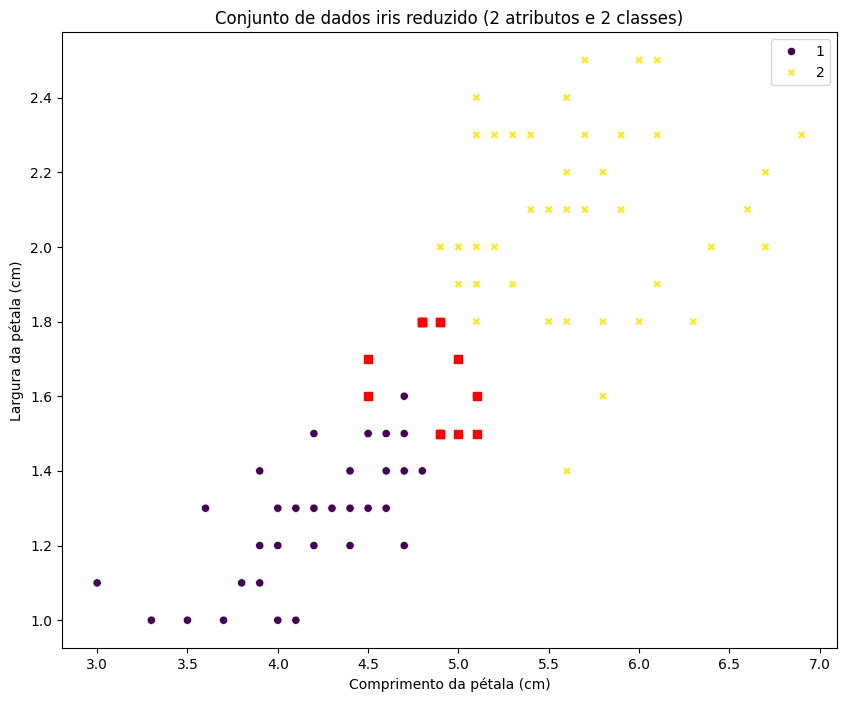

In [ ]:
plt.figure(figsize=(10, 8))
sns.scatterplot(x=X_petal_filtered[:, 0], y=X_petal_filtered[:, 1], hue=y_petal_filtered, style=y_petal_filtered,palette="viridis")
plt.scatter(X_petal_filtered[diff, 0], X_petal_filtered[diff, 1], c='red',marker='s')
plt.title("Conjunto de dados iris reduzido (2 atributos e 2 classes)")
plt.xlabel("Comprimento da pétala (cm)")
plt.ylabel("Largura da pétala (cm)")
plt.show()


## Transformação de dados

Conversão qualitativo - quantitativo com one-hot encoding da classe do conjunto iris

In [ ]:


encoder = OneHotEncoder(handle_unknown='ignore', sparse_output=False)
y_onehot = encoder.fit_transform(y.reshape(-1, 1))
print(y_onehot)

[[1. 0. 0.]
 [1. 0. 0.]
 [1. 0. 0.]
 [1. 0. 0.]
 [1. 0. 0.]
 [1. 0. 0.]
 [1. 0. 0.]
 [1. 0. 0.]
 [1. 0. 0.]
 [1. 0. 0.]
 [1. 0. 0.]
 [1. 0. 0.]
 [1. 0. 0.]
 [1. 0. 0.]
 [1. 0. 0.]
 [1. 0. 0.]
 [1. 0. 0.]
 [1. 0. 0.]
 [1. 0. 0.]
 [1. 0. 0.]
 [1. 0. 0.]
 [1. 0. 0.]
 [1. 0. 0.]
 [1. 0. 0.]
 [1. 0. 0.]
 [1. 0. 0.]
 [1. 0. 0.]
 [1. 0. 0.]
 [1. 0. 0.]
 [1. 0. 0.]
 [1. 0. 0.]
 [1. 0. 0.]
 [1. 0. 0.]
 [1. 0. 0.]
 [1. 0. 0.]
 [1. 0. 0.]
 [1. 0. 0.]
 [1. 0. 0.]
 [1. 0. 0.]
 [1. 0. 0.]
 [1. 0. 0.]
 [1. 0. 0.]
 [1. 0. 0.]
 [1. 0. 0.]
 [1. 0. 0.]
 [1. 0. 0.]
 [1. 0. 0.]
 [1. 0. 0.]
 [1. 0. 0.]
 [1. 0. 0.]
 [0. 1. 0.]
 [0. 1. 0.]
 [0. 1. 0.]
 [0. 1. 0.]
 [0. 1. 0.]
 [0. 1. 0.]
 [0. 1. 0.]
 [0. 1. 0.]
 [0. 1. 0.]
 [0. 1. 0.]
 [0. 1. 0.]
 [0. 1. 0.]
 [0. 1. 0.]
 [0. 1. 0.]
 [0. 1. 0.]
 [0. 1. 0.]
 [0. 1. 0.]
 [0. 1. 0.]
 [0. 1. 0.]
 [0. 1. 0.]
 [0. 1. 0.]
 [0. 1. 0.]
 [0. 1. 0.]
 [0. 1. 0.]
 [0. 1. 0.]
 [0. 1. 0.]
 [0. 1. 0.]
 [0. 1. 0.]
 [0. 1. 0.]
 [0. 1. 0.]
 [0. 1. 0.]
 [0. 1. 0.]
 [0. 1. 0.]
 [0.

Conversão quantitativo - qualitativo com discretização

In [ ]:

# Convert the NumPy array to a Pandas DataFrame
X_df = pd.DataFrame(X)

# Discretize the data
X_discretized = pd.DataFrame({
    col: pd.cut(X_df[col], 3)
    for col in X_df.columns
})

X_discretized.head(n=5)

,0,1,2,3
0,"(4.296, 5.5]","(2.8, 3.6]","(0.994, 2.967]","(0.0976, 0.9]"
1,"(4.296, 5.5]","(2.8, 3.6]","(0.994, 2.967]","(0.0976, 0.9]"
2,"(4.296, 5.5]","(2.8, 3.6]","(0.994, 2.967]","(0.0976, 0.9]"
3,"(4.296, 5.5]","(2.8, 3.6]","(0.994, 2.967]","(0.0976, 0.9]"
4,"(4.296, 5.5]","(2.8, 3.6]","(0.994, 2.967]","(0.0976, 0.9]"


In [ ]:
X_discretized.tail(n=5)

,0,1,2,3
145,"(5.5, 6.7]","(2.8, 3.6]","(4.933, 6.9]","(1.7, 2.5]"
146,"(5.5, 6.7]","(1.998, 2.8]","(4.933, 6.9]","(1.7, 2.5]"
147,"(5.5, 6.7]","(2.8, 3.6]","(4.933, 6.9]","(1.7, 2.5]"
148,"(5.5, 6.7]","(2.8, 3.6]","(4.933, 6.9]","(1.7, 2.5]"
149,"(5.5, 6.7]","(2.8, 3.6]","(4.933, 6.9]","(1.7, 2.5]"


Normalização do conjunto iris por reescala

In [ ]:
scaler = MinMaxScaler()
scaler.fit(X)
X_normalized = scaler.transform(X)
X_df = pd.DataFrame(X_normalized)
X_df.describe()


,0,1,2,3
count,150.000000,150.000000,150.000000,150.000000
mean,0.428704,0.440556,0.467458,0.458056
std,0.230018,0.181611,0.299203,0.317599
min,0.000000,0.000000,0.000000,0.000000
25%,0.222222,0.333333,0.101695,0.083333
50%,0.416667,0.416667,0.567797,0.500000
75%,0.583333,0.541667,0.694915,0.708333
max,1.000000,1.000000,1.000000,1.000000


Normalizando iris por padronização (média 0 e variância 1)

In [ ]:

scaler = StandardScaler()
X_normalized = scaler.fit_transform(X)
X_df = pd.DataFrame(X_normalized)
X_df.describe()


,0,1,2,3
count,1.500000e+02,1.500000e+02,1.500000e+02,1.500000e+02
mean,-1.468455e-15,-1.823726e-15,-1.610564e-15,-9.473903e-16
std,1.003350e+00,1.003350e+00,1.003350e+00,1.003350e+00
min,-1.870024e+00,-2.433947e+00,-1.567576e+00,-1.447076e+00
25%,-9.006812e-01,-5.923730e-01,-1.226552e+00,-1.183812e+00
50%,-5.250608e-02,-1.319795e-01,3.364776e-01,1.325097e-01
75%,6.745011e-01,5.586108e-01,7.627583e-01,7.906707e-01
max,2.492019e+00,3.090775e+00,1.785832e+00,1.712096e+00


PCA no conjunto iris

In [ ]:

pca = PCA(n_components=0.95)
pca.fit(X)
X_reduced = pca.transform(X)
print(X_reduced.shape)


(150, 2)


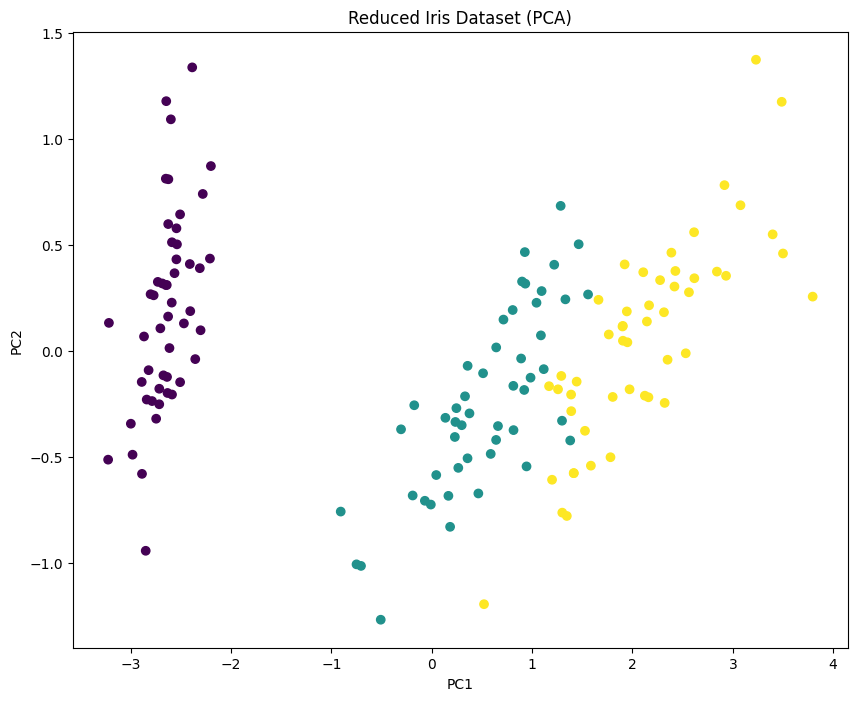

In [ ]:

# Plot the reduced data
plt.figure(figsize=(10, 8))
plt.scatter(X_reduced[:, 0], X_reduced[:, 1], c=y, cmap='viridis')
plt.title('Reduced Iris Dataset (PCA)')
plt.xlabel('PC1')
plt.ylabel('PC2')
plt.show()


In [ ]:

print(pca.components_)


[[ 0.36138659 -0.08452251  0.85667061  0.3582892 ]
 [ 0.65658877  0.73016143 -0.17337266 -0.07548102]]


Seleção de atributos no iris com um filtro

In [ ]:

# Feature extraction
test = SelectKBest(score_func=chi2,k='all')
fit = test.fit(X, y)
X_selected = fit.transform(X)

# Summarize scores
np.set_printoptions(precision=3)
print(fit.scores_)



[ 10.818   3.711 116.313  67.048]
